In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

# Libraries for data preparation 
#from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, f1_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

#Libraries for model building
#!pip install xgboost
#!pip install catboost
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, ElasticNet, SGDRegressor, BayesianRidge, LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import HistGradientBoostingRegressor
# from lightgbm import LGBMRegressor

In [2]:
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
df.to_csv('Iris.csv', index=False)

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [6]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


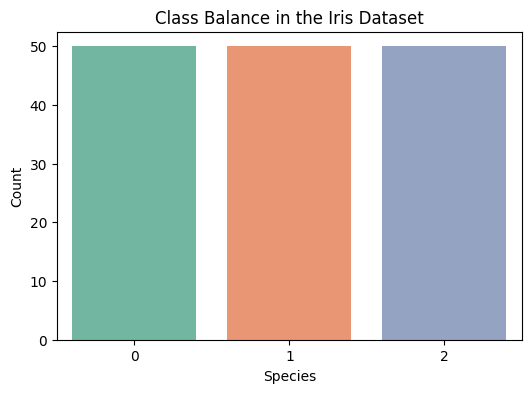

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='Set2')
plt.title('Class Balance in the Iris Dataset')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

In [8]:
X_train, X_test, y_train, y_test=train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:

Y_train_pred = model.predict(X_train)
Y_val_pred = model.predict(X_test)
train_score = f1_score(y_train, Y_train_pred, average='macro')
val_score = f1_score(y_test, Y_val_pred, average='macro')
print(f"Train F1 Score: {train_score}")
print(f"Validation F1 Score: {val_score}")

Train F1 Score: 0.9749960931395533
Validation F1 Score: 1.0
